# Crop Yield Prediction
### Md. Rubel Rana 1712661642
### Navid Al - Musabbir 1721853042

In [1]:
import graphviz
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.io as pio
import plotly.express as px
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy import stats
import autosklearn.regression
import autogluon.core as ag
from tpot import TPOTRegressor

from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe

import autosklearn
import sklearn.metrics

from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

from autosklearn.classification import AutoSklearnClassifier


from supervised.automl import AutoML
from supervised.preprocessing.eda import EDA

from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.metrics import accuracy_score


WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [2]:
# Dataset
dataset = 'dataset/Jute/jute.csv'

In [3]:
# Load dataset into dataframe
data = pd.read_csv(dataset)

## Data Exploration

In [4]:
data.shape

(701, 13)

In [5]:
data.columns

Index(['District', 'Area', 'Year', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Humidity', 'Wind', 'Cloud', 'Sunshine', 'ALT', 'Productions', 'PPH'],
      dtype='object')

In [6]:
data.head()

District    Area  Year  Max_Temp  Min_Temp  Rainfall  Humidity   Wind  \
0         2   67720  1969    38.625    22.900    115.75     70.50  1.425   
1         3     600  1969    33.650    23.200    323.75     81.00  3.525   
2         4  170895  1969    35.850    23.100    279.25     80.75  1.750   
3         5  216925  1969    36.075    23.850    123.75     74.25  1.775   
4         6  108805  1969    36.425    22.675    171.25     69.75  0.725   

   Cloud  Sunshine  ALT  Productions          PPH  
0  3.600  7.850000   20       187375  2.766907856  
1  4.325  7.750000    6         1380          2.3  
2  2.550  6.804545   10       540030  3.160010533  
3  3.975  7.650000    9       668225  3.080442549  
4  2.575  6.894000   37       292870  2.691696154

In [7]:
data.tail()

District    Area  Year  Max_Temp  Min_Temp  Rainfall  Humidity   Wind  \
696         5   13773  2013    36.625    24.625    190.25     68.75  2.625   
697         6   22389  2013    37.625    22.400    150.50     73.75  1.800   
698         7  176626  2013    37.375    23.825    184.50     74.75  2.400   
699         8   57912  2013    37.750    23.750    138.00     73.50  7.450   
700         9    5175  2013    37.475    24.375    180.75     77.25  2.200   

     Cloud  Sunshine  ALT  Productions          PPH  
696   4.45     5.700    9        52200   3.79002396  
697   3.95     6.425   37       108139  4.830005806  
698   3.55     6.175    9       722400  4.089998075  
699   3.30     6.250    7       296509  5.119992402  
700   4.00     6.325    4        22097  4.269951691

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     701 non-null    int64  
 1   Area         701 non-null    int64  
 2   Year         701 non-null    int64  
 3   Max_Temp     701 non-null    float64
 4   Min_Temp     701 non-null    float64
 5   Rainfall     701 non-null    float64
 6   Humidity     701 non-null    float64
 7   Wind         701 non-null    float64
 8   Cloud        701 non-null    float64
 9   Sunshine     701 non-null    float64
 10  ALT          701 non-null    int64  
 11  Productions  701 non-null    int64  
 12  PPH          701 non-null    object 
dtypes: float64(7), int64(5), object(1)
memory usage: 71.3+ KB


In [9]:
data.describe()

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


District           Area         Year    Max_Temp    Min_Temp  \
count  701.000000     701.000000   701.000000  701.000000  701.000000   
mean     9.105563   63093.758916  1991.673324   36.293616   23.001106   
std      4.990017   80387.860794    12.480853    1.665223    1.068327   
min      1.000000       0.000000  1969.000000   31.750000   14.275000   
25%      5.000000    3780.000000  1982.000000   35.175000   22.350000   
50%      9.000000   36080.000000  1992.000000   36.125000   23.075000   
75%     13.000000   84443.000000  2002.000000   37.300000   23.725000   
max     18.000000  471100.000000  2013.000000   43.450000   25.700000   

         Rainfall    Humidity        Wind       Cloud    Sunshine         ALT  \
count  701.000000  701.000000  701.000000  701.000000  701.000000  701.000000   
mean   210.430045   76.262409    1.935877    3.914408    6.757727   16.473609   
std    101.375567    4.731323    1.023349    0.605131    0.651849   14.050153   
min     16.250000   60.750000    0.175000    2.000000    4.350000    3.000000   
25%    138.000000   73.500000    1.275000    3.550000    6.400000    6.000000   
50%    188.250000   76.750000    1.675000    3.900000    6.804545   10.000000   
75%    256.750000   79.750000    2.300000    4.275000    7.181034   20.000000   
max    684.750000   88.000000    8.350000    5.875000    8.950000   63.000000   

        Productions  
count  7.010000e+02  
mean   2.183739e+05  
std    2.711843e+05  
min    0.000000e+00  
25%    1.076100e+04  
50%    1.228800e+05  
75%    2.993610e+05  
max    1.378335e+06

## Data Preprocessing

#### a. Removing 0's and NaN values

In [10]:
# Checking 0 values
(data == 0).sum(axis=0)

District        0
Area           45
Year            0
Max_Temp        0
Min_Temp        0
Rainfall        0
Humidity        0
Wind            0
Cloud           0
Sunshine        0
ALT             0
Productions    45
PPH             0
dtype: int64

In [11]:
# Replace 0's with NaN
data.replace(0, np.nan, inplace=True)

In [12]:
data.isnull().sum().sum()

90

In [13]:
# Drop all NaN values
data = data.dropna()
data = data.reset_index(drop=True)

In [14]:
data.isnull().values.any()

False

In [15]:
# Be ensure about 0's and NaN values
(data == 0).sum(axis=0)

District       0
Area           0
Year           0
Max_Temp       0
Min_Temp       0
Rainfall       0
Humidity       0
Wind           0
Cloud          0
Sunshine       0
ALT            0
Productions    0
PPH            0
dtype: int64

In [16]:
data['Area'] = data.Area.astype(int)
data['Productions'] = data.Area.astype(int)
data['PPH'] = pd.to_numeric(data['PPH'])

In [17]:
data.shape

(656, 13)

In [18]:
data.head()

District    Area  Year  Max_Temp  Min_Temp  Rainfall  Humidity   Wind  \
0         2   67720  1969    38.625    22.900    115.75     70.50  1.425   
1         3     600  1969    33.650    23.200    323.75     81.00  3.525   
2         4  170895  1969    35.850    23.100    279.25     80.75  1.750   
3         5  216925  1969    36.075    23.850    123.75     74.25  1.775   
4         6  108805  1969    36.425    22.675    171.25     69.75  0.725   

   Cloud  Sunshine  ALT  Productions       PPH  
0  3.600  7.850000   20        67720  2.766908  
1  4.325  7.750000    6          600  2.300000  
2  2.550  6.804545   10       170895  3.160011  
3  3.975  7.650000    9       216925  3.080443  
4  2.575  6.894000   37       108805  2.691696

In [19]:
data.tail()

District    Area  Year  Max_Temp  Min_Temp  Rainfall  Humidity   Wind  \
651         5   13773  2013    36.625    24.625    190.25     68.75  2.625   
652         6   22389  2013    37.625    22.400    150.50     73.75  1.800   
653         7  176626  2013    37.375    23.825    184.50     74.75  2.400   
654         8   57912  2013    37.750    23.750    138.00     73.50  7.450   
655         9    5175  2013    37.475    24.375    180.75     77.25  2.200   

     Cloud  Sunshine  ALT  Productions       PPH  
651   4.45     5.700    9        13773  3.790024  
652   3.95     6.425   37        22389  4.830006  
653   3.55     6.175    9       176626  4.089998  
654   3.30     6.250    7        57912  5.119992  
655   4.00     6.325    4         5175  4.269952

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     656 non-null    int64  
 1   Area         656 non-null    int64  
 2   Year         656 non-null    int64  
 3   Max_Temp     656 non-null    float64
 4   Min_Temp     656 non-null    float64
 5   Rainfall     656 non-null    float64
 6   Humidity     656 non-null    float64
 7   Wind         656 non-null    float64
 8   Cloud        656 non-null    float64
 9   Sunshine     656 non-null    float64
 10  ALT          656 non-null    int64  
 11  Productions  656 non-null    int64  
 12  PPH          656 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 66.8 KB


#### b. Removing Outliers 

In [21]:
z = np.abs(stats.zscore(data))

In [22]:
np.where(z > 7)

(array([ 54, 277]), array([ 4, 12]))

In [23]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [24]:
(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

District   Area   Year  Max_Temp  Min_Temp  Rainfall  Humidity   Wind  \
0       False  False  False     False     False     False     False  False   
1       False  False  False     False     False     False     False   True   
2       False  False  False     False     False     False     False  False   
3       False   True  False     False     False     False     False  False   
4       False  False  False     False     False     False     False  False   
..        ...    ...    ...       ...       ...       ...       ...    ...   
651     False  False  False     False     False     False     False  False   
652     False  False  False     False     False     False     False  False   
653     False  False  False     False     False     False     False  False   
654     False  False  False     False     False     False     False   True   
655     False  False  False     False     False     False     False  False   

     Cloud  Sunshine    ALT  Productions    PPH  
0    False     False  False        False  False  
1    False     False  False        False  False  
2    False     False  False        False  False  
3    False     False  False         True  False  
4    False     False  False        False  False  
..     ...       ...    ...          ...    ...  
651  False     False  False        False  False  
652  False     False  False        False  False  
653  False     False  False        False  False  
654  False     False  False        False  False  
655  False     False  False        False  False  

[656 rows x 13 columns]

In [25]:
data.shape

(656, 13)

In [26]:
data = data[(z < 7).all(axis=1)]

In [27]:
data.shape

(654, 13)

## Spliting Data

In [28]:
X = data[['District', 'Year', 'Max_Temp', 'Min_Temp', 'Rainfall', 'Humidity', 'Wind', 'Cloud', 'Sunshine', 'ALT']]
y = data['PPH']

#### a. Train data & Test data

In [29]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.3)

#### a. Train data & Validation data

In [30]:
X_train, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.3)

## 1. Performing Automating EDA

Considering 7 the most frequent values
Considering 7 the most frequent values
Considering 7 the most frequent values


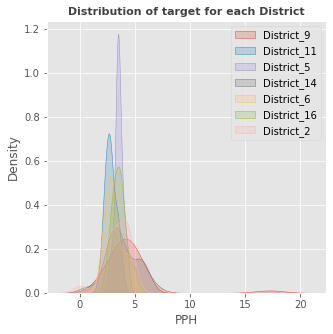

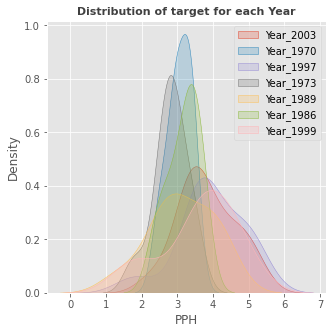

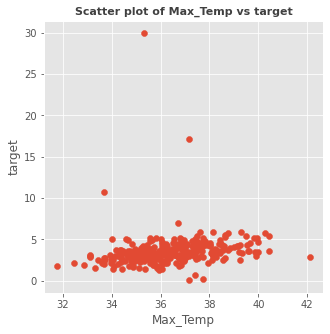

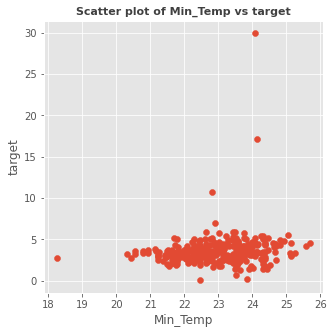

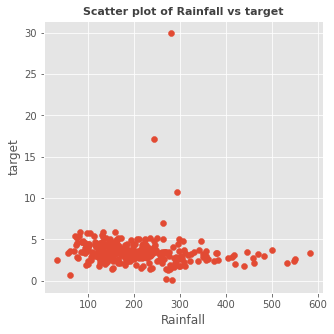

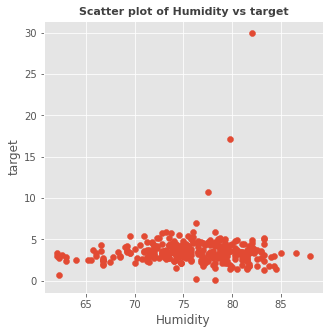

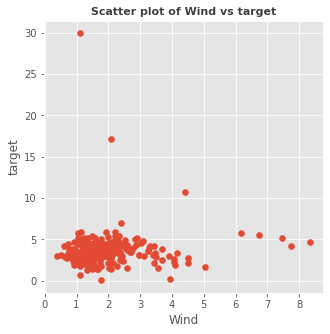

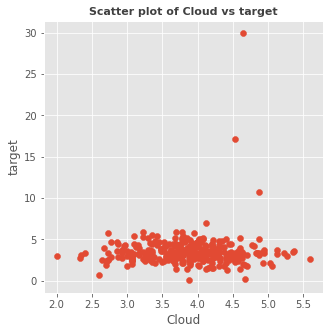

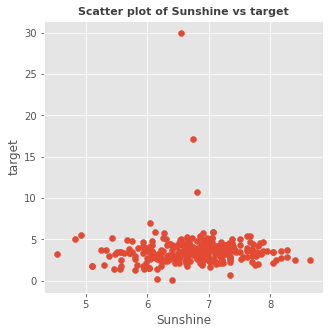

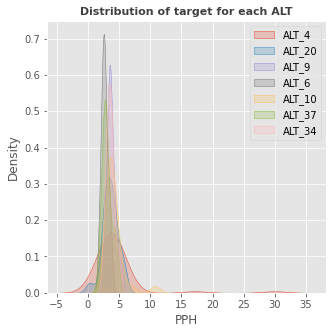

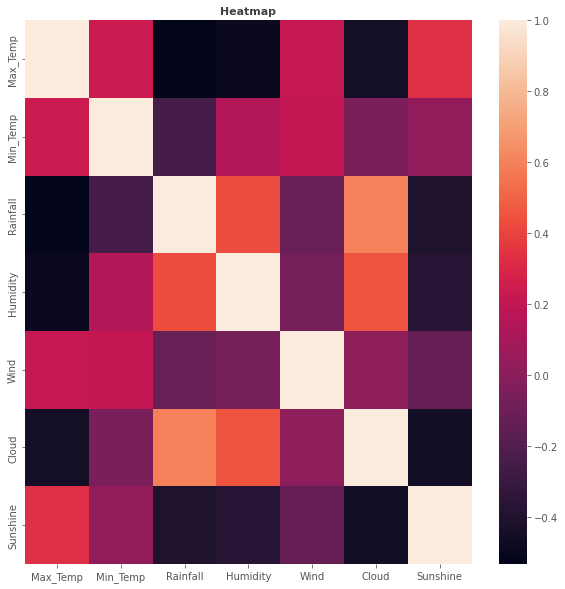

In [31]:
EDA.extensive_eda(X_train,y_valid,save_path="content/mljar-supervised/jute")

## Creating AutoML Models

In [32]:
automl = AutoML(mode='Compete',
                total_time_limit=10,
                results_path="AutoML_classifier/Jute")

In [33]:
automl.fit(X_train, y_valid)

This model has already been fitted. You can use predict methods or select a new 'results_path' for a new 'fit()'.


In [34]:
predictions = automl.predict(X_test)

#### a. RMSE

In [35]:
metrics.mean_squared_error(y_test, predictions)

0.27043818220791704

#### b. MAE

In [36]:
metrics.mean_absolute_error(y_test, predictions)

0.40096762949137044

#### c. R2

In [37]:
metrics.r2_score(y_test, predictions)

0.663768192276015

In [38]:
y_pred = automl.predict(X_train)

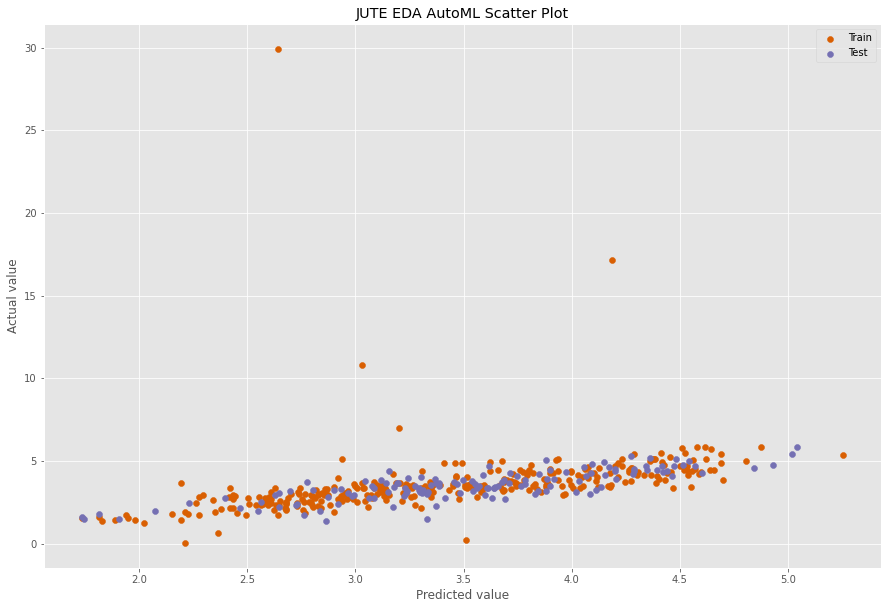

In [39]:
plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_valid, label="Train", color='#d95f02')
plt.scatter(predictions, y_test, label="Test", color='#7570b3')
plt.title('JUTE EDA AutoML Scatter Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend()
plt.savefig("fig_content/jute_eda_automl_scatter.png")
plt.show()

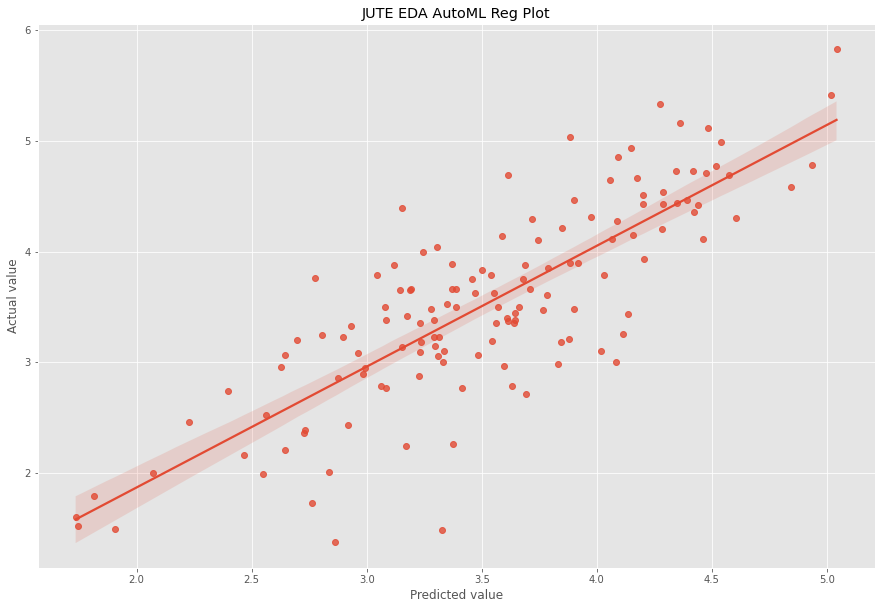

In [40]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions, y = y_test, data = data)
plt.title('JUTE EDA AutoML Reg Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("reg_content/jute_eda_automl_reg.png")

## 2. AutoSklearn Regression

In [41]:
autosk = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='autosklearn_regression/jute',
    resampling_strategy='holdout',
    resampling_strategy_arguments={'folds': 5},
)

In [42]:
autosk.fit(X_train, y_valid, dataset_name='data')

[WARNING] [2021-09-18 23:59:32,993:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 1. Number of dummy models: 1


AutoSklearnRegressor(per_run_time_limit=30,
                     resampling_strategy_arguments={'folds': 5},
                     time_left_for_this_task=120,
                     tmp_folder='autosklearn_regression/jute')

In [43]:
autosk.leaderboard()

rank  ensemble_weight              type      cost  duration
model_id                                                             
23           1             0.66               sgd  0.524806  0.891876
32           2             0.16          adaboost  0.600827  0.754546
21           3             0.06       extra_trees  0.856881  1.709556
17           4             0.12  gaussian_process  1.011736  1.309393

In [44]:
print(autosk.show_models())

[(0.660000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'polynomial', 'regressor:__choice__': 'sgd', 'feature_preprocessor:polynomial:degree': 3, 'feature_preprocessor:polynomial:include_bias': 'False', 'feature_preprocessor:polynomial:interaction_only': 'False', 'regressor:sgd:alpha': 0.0006517033225329654, 'regressor:sgd:average': 'False', 'regressor:sgd:fit_intercept': 'True', 'regressor:sgd:learning_rate': 'invscaling', 'regressor:sgd:loss': 'epsilon_insensitive', 'regressor:sgd:penalty': 'elasticnet', 'regressor:sgd:tol': 0.002431731981071206, 'regressor:sgd:epsilon': 0.012150149892783745, 'regressor:sgd:eta0': 0.016444224834

In [45]:
predictions = autosk.predict(X_test)

#### a. RMSE

In [46]:
metrics.mean_squared_error(y_test, predictions)

0.430699725190075

#### b. MAE

In [47]:
metrics.mean_absolute_error(y_test, predictions)

0.5203436568827772

#### c. R2

In [48]:
metrics.r2_score(y_test, predictions)

0.46451737693035333

In [49]:
y_pred = autosk.predict(X_train)

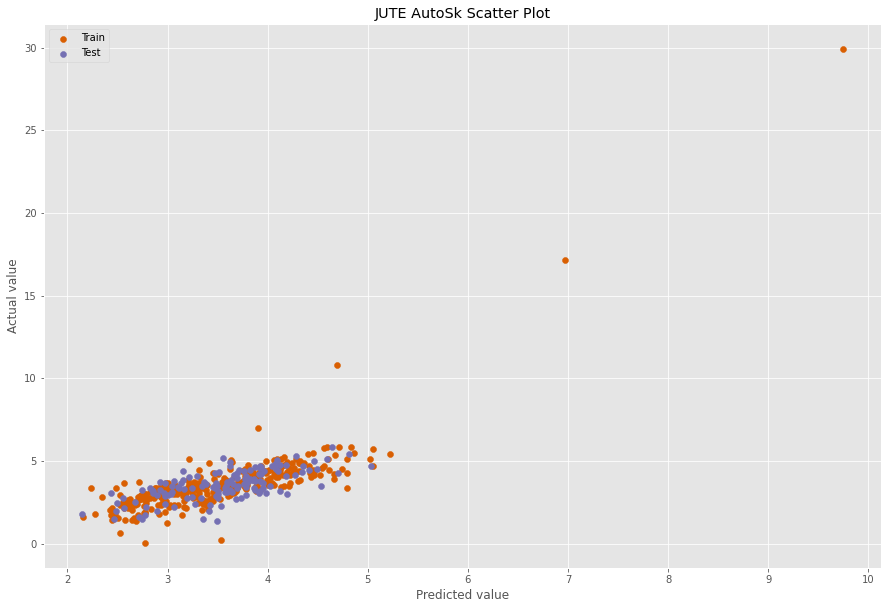

In [50]:
plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_valid, label="Train", color='#d95f02')
plt.scatter(predictions, y_test, label="Test", color='#7570b3')
plt.title('JUTE AutoSk Scatter Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend()
plt.savefig("fig_content/jute_autosk_scatter.png")
plt.show()

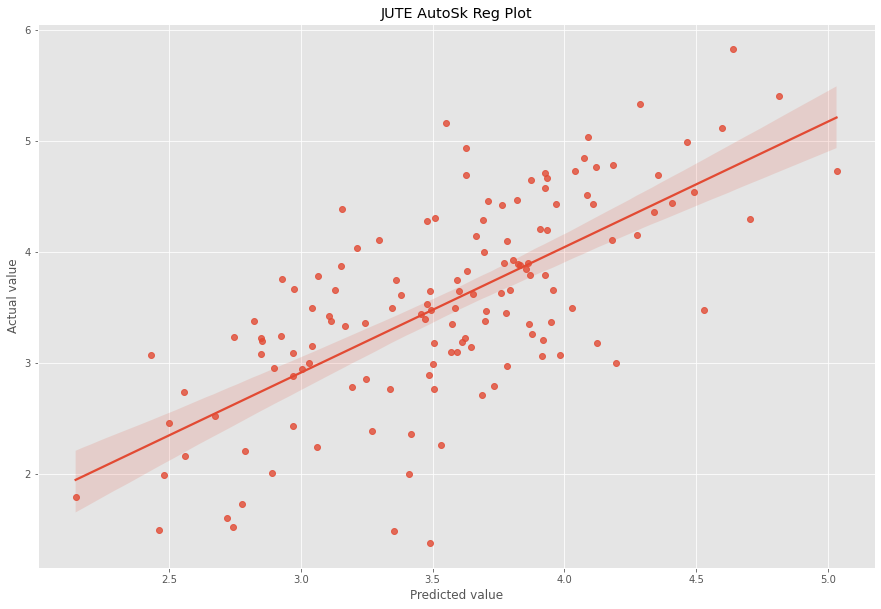

In [51]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions, y = y_test, data = data)
plt.title('JUTE AutoSk Reg Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("reg_content/jute_autosk_reg.png")

## 3. AutoGluon

In [52]:
train_data = TabularDataset('dataset/Jute/train_data.csv')

In [53]:
test_data = TabularDataset('dataset/Jute/test_data.csv')

In [54]:
# Checking 0 values
(train_data == 0).sum(axis=0)
(test_data == 0).sum(axis=0)

District        0
Area           29
Year            0
Max_Temp        0
Min_Temp        0
Rainfall        0
Humidity        0
Wind            0
Cloud           0
Sunshine        0
ALT             0
Productions    29
PPH             0
dtype: int64

In [55]:
# Replace 0's with NaN
train_data.replace(0, np.nan, inplace=True)
test_data.replace(0, np.nan, inplace=True)

In [56]:
train_data.isnull().sum().sum()
test_data.isnull().sum().sum()

60

In [57]:
# Drop all NaN values
train_data = train_data.dropna()
train_data = train_data.reset_index(drop=True)
test_data = test_data.dropna()
test_data = test_data.reset_index(drop=True)

In [58]:
train_data.isnull().values.any()
test_data.isnull().values.any()

False

In [59]:
# Be ensure about 0's and NaN values
(train_data == 0).sum(axis=0)
(test_data == 0).sum(axis=0)

District       0
Area           0
Year           0
Max_Temp       0
Min_Temp       0
Rainfall       0
Humidity       0
Wind           0
Cloud          0
Sunshine       0
ALT            0
Productions    0
PPH            0
dtype: int64

In [60]:
train_data['Area'] = train_data.Area.astype(int)
train_data['Productions'] = train_data.Area.astype(int)
train_data['PPH'] = pd.to_numeric(train_data['PPH'])
test_data['Area'] = test_data.Area.astype(int)
test_data['Productions'] = test_data.Area.astype(int)
test_data['PPH'] = pd.to_numeric(test_data['PPH'])

In [61]:
label = 'PPH'

In [62]:
data[label].describe()

count    654.000000
mean       3.505220
std        1.620460
min        0.039932
25%        2.822349
50%        3.399541
75%        4.090037
max       29.930905
Name: PPH, dtype: float64

In [63]:
save_path = 'autogluon/jute'

In [64]:
hyperparameters = {
    'NN': {'num_epochs': 10, 'activation': 'relu', 'dropout_prob': ag.Real(0.0, 0.5)},
    'GBM': {'num_boost_round': 1000, 'learning_rate': ag.Real(0.01, 0.1, log=True)},
    'XGB': {'n_estimators': 1000, 'learning_rate': ag.Real(0.01, 0.1, log=True)}
}

In [65]:
predictor = TabularPredictor(label=label, path=save_path).fit(
    train_data, hyperparameters=hyperparameters, hyperparameter_tune_kwargs='auto', time_limit=60
)

[WARNING] [2021-09-19 00:01:23,420:autogluon.core.utils.utils] Warning: path already exists! This predictor may overwrite an existing predictor! path="autogluon/jute"
[WARNING] [2021-09-19 00:01:23,422:root] Warning: hyperparameter tuning is currently experimental and may cause the process to hang.


In [66]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   -0.557174       0.010167  3.832105                0.000355           0.287798            2       True         30
1            XGBoost/T8   -0.558648       0.008541  1.648501                0.008541           1.648501            1       True         19
2            XGBoost/T3   -0.617209       0.023626  1.130837                0.023626           1.130837            1       True         14
3            XGBoost/T7   -0.695614       0.033046  6.608588                0.033046           6.608588            1       True         18
4            XGBoost/T2   -0.881432       0.014657  0.916955                0.014657           0.916955            1       True         13
5            XGBoost/T0   -0.951696       0.032237  3.037309                0.032237           3.037309 

AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"


{'model_types': {'LightGBM/T0': 'LGBModel',
  'LightGBM/T1': 'LGBModel',
  'LightGBM/T2': 'LGBModel',
  'LightGBM/T3': 'LGBModel',
  'LightGBM/T4': 'LGBModel',
  'LightGBM/T5': 'LGBModel',
  'LightGBM/T6': 'LGBModel',
  'LightGBM/T7': 'LGBModel',
  'LightGBM/T8': 'LGBModel',
  'LightGBM/T9': 'LGBModel',
  'XGBoost/T0': 'XGBoostModel',
  'XGBoost/T1': 'XGBoostModel',
  'XGBoost/T2': 'XGBoostModel',
  'XGBoost/T3': 'XGBoostModel',
  'XGBoost/T4': 'XGBoostModel',
  'XGBoost/T5': 'XGBoostModel',
  'XGBoost/T6': 'XGBoostModel',
  'XGBoost/T7': 'XGBoostModel',
  'XGBoost/T8': 'XGBoostModel',
  'NeuralNetMXNet/T0': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T1': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T2': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T3': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T4': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T5': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T6': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T7': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T8': 

In [67]:
perf = predictor.evaluate(test_data)

In [68]:
y_pred = predictor.predict_proba(test_data)

In [69]:
perf = predictor.evaluate_predictions(y_true=test_data[label], y_pred=y_pred, auxiliary_metrics=True)

In [70]:
perf

{'root_mean_squared_error': -3.6569745275327943,
 'mean_squared_error': -13.373462695023704,
 'mean_absolute_error': -1.9915243836117833,
 'r2': -21.192873075547784,
 'pearsonr': -0.41799088387500194,
 'median_absolute_error': -1.0323087616188356}

## 4. Hyperopt

In [71]:
n_iter=10

In [72]:
num_folds=2

In [73]:
kf = KFold(n_splits=num_folds, random_state=None)

In [74]:
model = LGBMRegressor(random_state=42)

#### a. RMSE

In [75]:
abs(cross_val_score(model, X, y, scoring='neg_mean_squared_error')).mean()

2.7120900792044447

#### b. MAE

In [76]:
abs(cross_val_score(model, X, y, scoring='neg_mean_absolute_error')).mean()

0.7801645041345615

#### c. R2

In [77]:
abs(cross_val_score(model, X, y, scoring='r2')).mean()

0.5211249863019536

## 5. TPOT

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

In [79]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)

In [80]:
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.7700324170356856

Generation 2 - Current best internal CV score: -2.7446851961109733

Generation 3 - Current best internal CV score: -2.7446851961109733

Generation 4 - Current best internal CV score: -2.6481703591422256

Generation 5 - Current best internal CV score: -2.6481703591422256

Best pipeline: LassoLarsCV(AdaBoostRegressor(input_matrix, learning_rate=0.01, loss=square, n_estimators=100), normalize=True)


TPOTRegressor(generations=5, population_size=50, random_state=42, verbosity=2)

In [81]:
predictions = tpot.predict(X_test)

#### b. RMSE

In [82]:
metrics.mean_squared_error(y_test, predictions)

0.7017544491063418

#### b. MAE

In [83]:
metrics.mean_absolute_error(y_test, predictions)

0.6047136969335271

#### c. R2

In [84]:
metrics.r2_score(y_test, predictions)

0.2927480993765381

In [85]:
y_pred = tpot.predict(X_train)

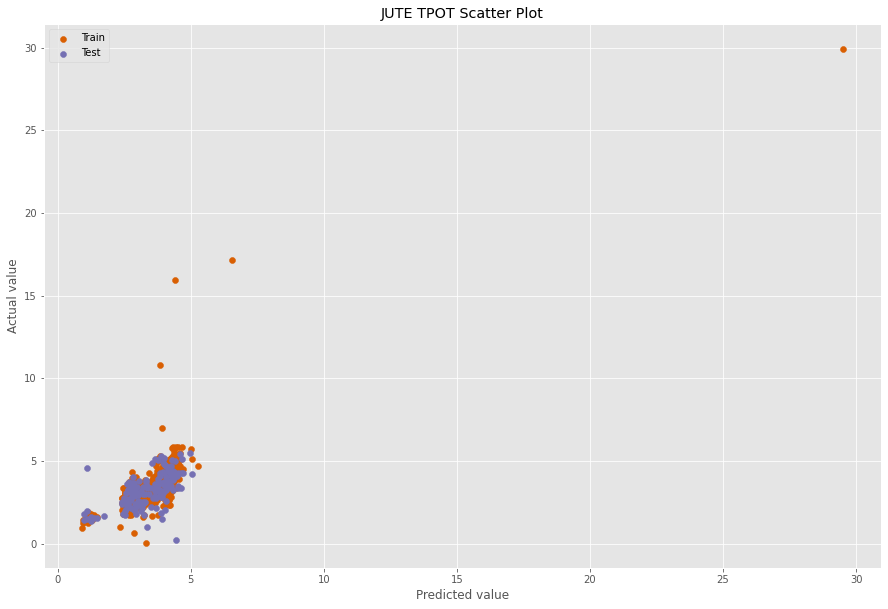

In [86]:
plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_train, label="Train", color='#d95f02')
plt.scatter(predictions, y_test, label="Test", color='#7570b3')
plt.title('JUTE TPOT Scatter Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend()
plt.savefig("fig_content/jute_tpot_scatter.png")
plt.show()

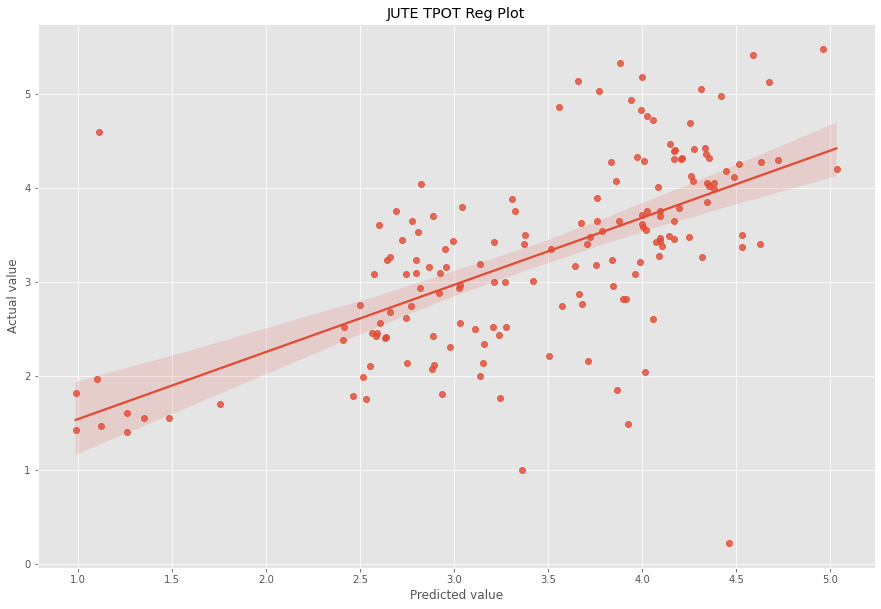

In [87]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions, y = y_test, data = data)
plt.title('JUTE TPOT Reg Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("reg_content/jute_tpot_reg.png")

## 6. EvalML => AutoMLSearch

In [88]:
import evalml
from evalml import AutoMLSearch

In [89]:
X_train, X_holdout, y_train, y_holdout = evalml.preprocessing.split_data(X, y, problem_type='regression', test_size=0.3, random_seed=0)

In [90]:
automl = AutoMLSearch(X_train = X_train, y_train=y_train, problem_type = "regression",max_batches=1,optimize_thresholds=True)
automl.search()

Parameters for components {'Baseline Classifier'} will not be used to instantiate the pipeline since they don't appear in the pipeline


[WARNING] [2021-09-19 00:06:24,417:evalml.automl.automl_search] 	High coefficient of variation (cv >= 0.5) within cross validation scores.
	XGBoost Regressor w/ Imputer may not perform as estimated on unseen data.
[WARNING] [2021-09-19 00:06:26,493:evalml.automl.automl_search] 	High coefficient of variation (cv >= 0.5) within cross validation scores.
	Decision Tree Regressor w/ Imputer may not perform as estimated on unseen data.


In [91]:
automl.rankings

id                                      pipeline_name  search_order  \
0   7                      LightGBM Regressor w/ Imputer             7   
1   1  Elastic Net Regressor w/ Imputer + Standard Sc...             1   
2   4                      CatBoost Regressor w/ Imputer             4   
3   0                  Mean Baseline Regression Pipeline             0   
4   2                   Extra Trees Regressor w/ Imputer             2   
5   5                 Random Forest Regressor w/ Imputer             5   
6   3                       XGBoost Regressor w/ Imputer             3   
7   6                 Decision Tree Regressor w/ Imputer             6   

   mean_cv_score  standard_deviation_cv_score  validation_score  \
0       0.149964                     0.119521          0.013521   
1       0.125484                     0.112299          0.005923   
2       0.034937                     0.036621         -0.005391   
3      -0.026176                     0.009308         -0.019163   
4      -0.037088                     0.168643          0.018009   
5      -0.247670                     0.249157          0.003711   
6      -1.172684                     1.022180         -0.012099   
7      -2.332605                     4.191732          0.007848   

   percent_better_than_baseline  high_variance_cv  \
0                    672.898699             False   
1                    579.377437             False   
2                    233.468959             False   
3                      0.000000             False   
4                    -41.685123             False   
5                   -846.158032             False   
6                  -4379.924175              True   
7                  -8811.091023              True   

                                          parameters  
0  {'Imputer': {'categorical_impute_strategy': 'm...  
1  {'Imputer': {'categorical_impute_strategy': 'm...  
2  {'Imputer': {'categorical_impute_strategy': 'm...  
3       {'Baseline Regressor': {'strategy': 'mean'}}  
4  {'Imputer': {'categorical_impute_strategy': 'm...  
5  {'Imputer': {'categorical_impute_strategy': 'm...  
6  {'Imputer': {'categorical_impute_strategy': 'm...  
7  {'Imputer': {'categorical_impute_strategy': 'm...

In [92]:
best_pipeline = automl.best_pipeline
best_pipeline

pipeline = RegressionPipeline(component_graph={'Imputer': ['Imputer', 'X', 'y'], 'LightGBM Regressor': ['LightGBM Regressor', 'Imputer.x', 'y']}, parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'LightGBM Regressor':{'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 20, 'max_depth': 0, 'num_leaves': 31, 'min_child_samples': 20, 'n_jobs': -1, 'bagging_freq': 0, 'bagging_fraction': 0.9}}, random_seed=0)

In [93]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


*********************************
* LightGBM Regressor w/ Imputer *
*********************************

Problem Type: regression
Model Family: LightGBM

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. LightGBM Regressor
	 * boosting_type : gbdt
	 * learning_rate : 0.1
	 * n_estimators : 20
	 * max_depth : 0
	 * num_leaves : 31
	 * min_child_samples : 20
	 * n_jobs : -1
	 * bagging_freq : 0
	 * bagging_fraction : 0.9

Training
Training for regression problems.
Total training time (including CV): 0.4 seconds

Cross Validation
----------------
               R2  ExpVariance  MaxError  MedianAE   MSE   MAE  Root Mean Squared Error # Training # Validation
0           0.014        0.030    27.303     0.410 6.379 0.748                    2.526        304          153
1           0.200        0.305     2.775     0.558 0.741 0.658                    0.861        305   

In [94]:
automl.describe_pipeline(1)


******************************************************
* Elastic Net Regressor w/ Imputer + Standard Scaler *
******************************************************

Problem Type: regression
Model Family: Linear

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Standard Scaler
3. Elastic Net Regressor
	 * alpha : 0.0001
	 * l1_ratio : 0.15
	 * max_iter : 1000
	 * normalize : False

Training
Training for regression problems.
Total training time (including CV): 0.5 seconds

Cross Validation
----------------
               R2  ExpVariance  MaxError  MedianAE   MSE   MAE  Root Mean Squared Error # Training # Validation
0           0.006        0.021    27.016     0.437 6.428 0.837                    2.535        304          153
1           0.229        0.272     2.641     0.552 0.715 0.664                    0.845        305          152
2           0.142        

In [95]:
automl.results

{'pipeline_results': {0: {'id': 0,
   'pipeline_name': 'Mean Baseline Regression Pipeline',
   'pipeline_class': evalml.pipelines.regression_pipeline.RegressionPipeline,
   'pipeline_summary': 'Baseline Regressor',
   'parameters': {'Baseline Regressor': {'strategy': 'mean'}},
   'mean_cv_score': -0.026176428985226357,
   'standard_deviation_cv_score': 0.009307760406535243,
   'high_variance_cv': False,
   'training_time': 0.07723259925842285,
   'cv_data': [{'all_objective_scores': OrderedDict([('R2',
                   -0.019163219716876956),
                  ('ExpVariance', -2.220446049250313e-16),
                  ('MaxError', 26.55167376407237),
                  ('MedianAE', 0.6207692440723687),
                  ('MSE', 6.589859760164913),
                  ('MAE', 0.991878372501935),
                  ('Root Mean Squared Error', 2.5670722156115735),
                  ('# Training', 304),
                  ('# Validation', 153)]),
     'mean_cv_score': -0.019163219716876956,
 

In [96]:
evalml.objectives.get_all_objective_names()

['expvariance',
 'maxerror',
 'medianae',
 'mse',
 'mae',
 'r2',
 'mean squared log error',
 'root mean squared log error',
 'root mean squared error',
 'mean absolute percentage error',
 'mcc multiclass',
 'log loss multiclass',
 'auc weighted',
 'auc macro',
 'auc micro',
 'recall weighted',
 'recall macro',
 'recall micro',
 'precision weighted',
 'precision macro',
 'precision micro',
 'f1 weighted',
 'f1 macro',
 'f1 micro',
 'balanced accuracy multiclass',
 'accuracy multiclass',
 'mcc binary',
 'log loss binary',
 'gini',
 'auc',
 'recall',
 'precision',
 'f1',
 'balanced accuracy binary',
 'accuracy binary',
 'sensitivity at low alert rates',
 'lead scoring',
 'fraud cost',
 'cost benefit matrix']

## Graphical Representation

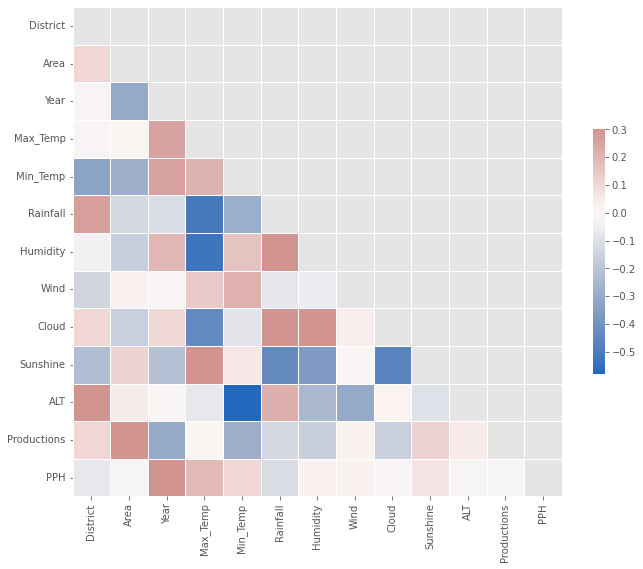

In [97]:
correlation_data=data.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

<Figure size 720x720 with 0 Axes>

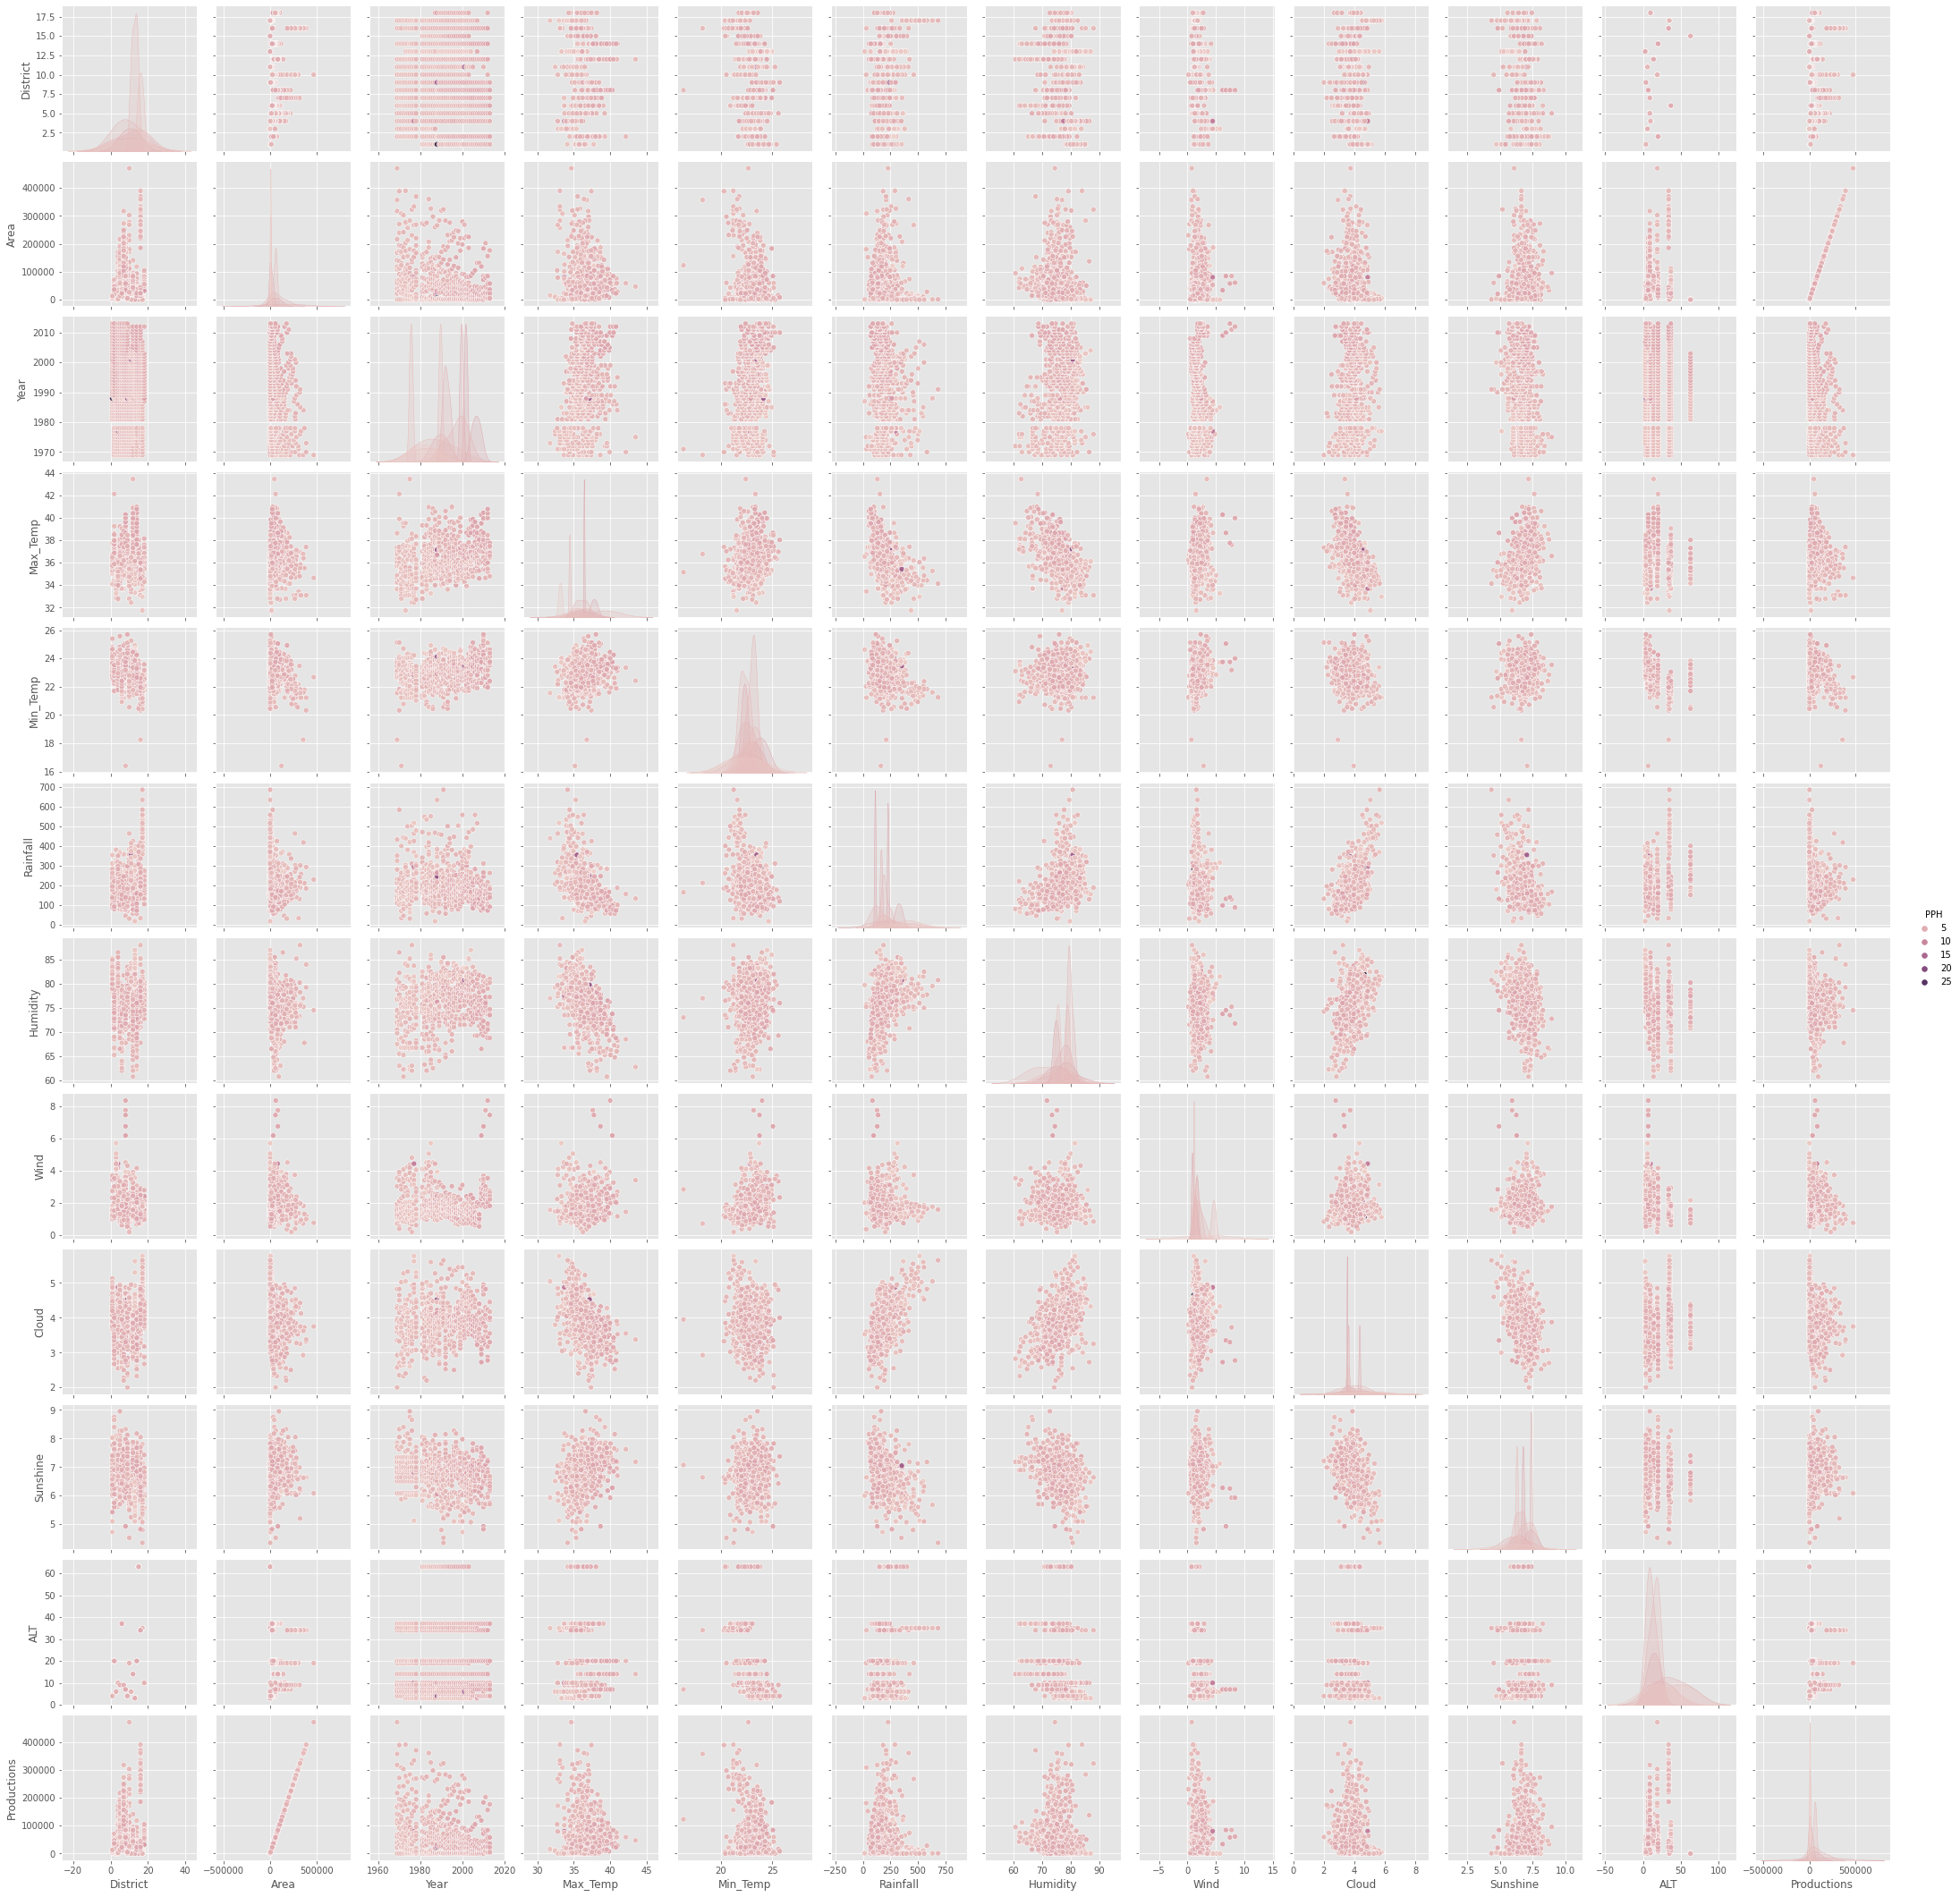

In [98]:
plt.figure(figsize=(10, 10))
sns.pairplot(data, hue='PPH');

In [99]:
pio.templates.default = "seaborn"
plt.figure(figsize=(16, 16))
fig = px.line(data, x = "Year", y = "Rainfall", color = "Year")
fig.show()

<Figure size 1152x1152 with 0 Axes>

In [100]:
pio.templates.default = "seaborn"
plt.figure(figsize=(10, 10))
fig = px.line(data, x = "Cloud", y = "Rainfall", color = "Cloud")
fig.show()

<Figure size 720x720 with 0 Axes>

In [101]:
pio.templates.default = "seaborn"
plt.figure(figsize=(16, 16))
fig = px.line(data, x = "Humidity", y = "Rainfall", color = "Humidity")
fig.show()

<Figure size 1152x1152 with 0 Axes>

In [102]:
pio.templates.default = "seaborn"
plt.figure(figsize=(16, 16))
fig = px.line(data, x = "Year", y = "PPH", color = "Year")
fig.show()

<Figure size 1152x1152 with 0 Axes>